In [1]:
%pylab inline
import gymness.aggregate as agg

matplotlib.rcParams.update({'font.size': 18})

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = agg.aggregate_data('data/data-3005' )
df2 = agg.aggregate_data('data/data-3005' )
df.sort_values(['x','probe'],inplace=True)
df2.sort_values(['x','probe'],inplace=True)
agg.remove_bias(df,['T_e','n_e','i_ionic_sat', 'f_ep','v_plasma'])
df.head()


Reading dataset:['160530009', '160530013', '160530002', '160530011', '160530010', '160530014', '160530008', '160530015', '160530007', '160530001', '160530004', '160530006', '160530003', '160530012', '160530005']
Reading dataset:['160530009', '160530013', '160530002', '160530011', '160530010', '160530014', '160530008', '160530015', '160530007', '160530001', '160530004', '160530006', '160530003', '160530012', '160530005']


id  probe     x  I_B         P  W_em       T_e   err_T_e  \
18  160530001      1 -10.0  600  0.000156    60  3.908187  0.023935   
4   160530002      1  -9.3  600  0.000156    60  4.023187  0.021483   
24  160530003      1  -8.6  600  0.000156    60  3.985303  0.023846   
20  160530004      1  -7.9  600  0.000157    60  4.003136  0.024192   
28  160530005      1  -7.2  600  0.000157    60  3.980081  0.027966   

             n_e       err_n_e    ...      err_f_ep   v_plasma  err_v_plasma  \
18  3.251988e+16  1.177994e+14    ...           NaN  11.702298      0.096661   
4   3.271328e+16  1.115569e+14    ...           NaN  11.813394      0.088434   
24  3.223465e+16  1.196168e+14    ...           NaN  11.737532      0.097467   
20  3.202441e+16  1.206669e+14    ...           NaN  11.768623      0.098654   
28  3.214521e+16  1.349816e+14    ...           NaN  11.666192      0.112419   

       alpha  err_alpha  v_floating  err_v_floating  i_ionic_sat  \
18  0.019303   0.000384   -0.914780        0.024854    -0.000433   
4   0.018393   0.000366   -1.148685        0.023984    -0.000441   
24  0.019865   0.000411   -1.110894        0.025930    -0.000433   
20  0.020356   0.000423   -1.133301        0.026077    -0.000430   
28  0.020319   0.000458   -1.166568        0.028520    -0.000431   

    err_i_ionic_sat      j_sat  
18         0.000002 -27.098117  
4          0.000002 -27.699457  
24         0.000003 -27.034000  
20         0.000003 -26.855139  
28         0.000003 -26.916205  

[5 rows x 21 columns]

In [4]:
def fix_ax(ax,fig):
    ax.xaxis.set_ticks(np.arange(-10,11,1))
    ax.axvline(x=-3.538,linestyle="dashed", color="g", linewidth=2)
    fig.set_size_inches(18,9)

In [5]:
plot_text = 'Plasma conditions:\n' +\
'$W_{em} = 60 \%$ \n' +\
'$p = 1.57 \cdot 10^{-4}$ mBar\n'  +\
'$I_B = 600$ A'


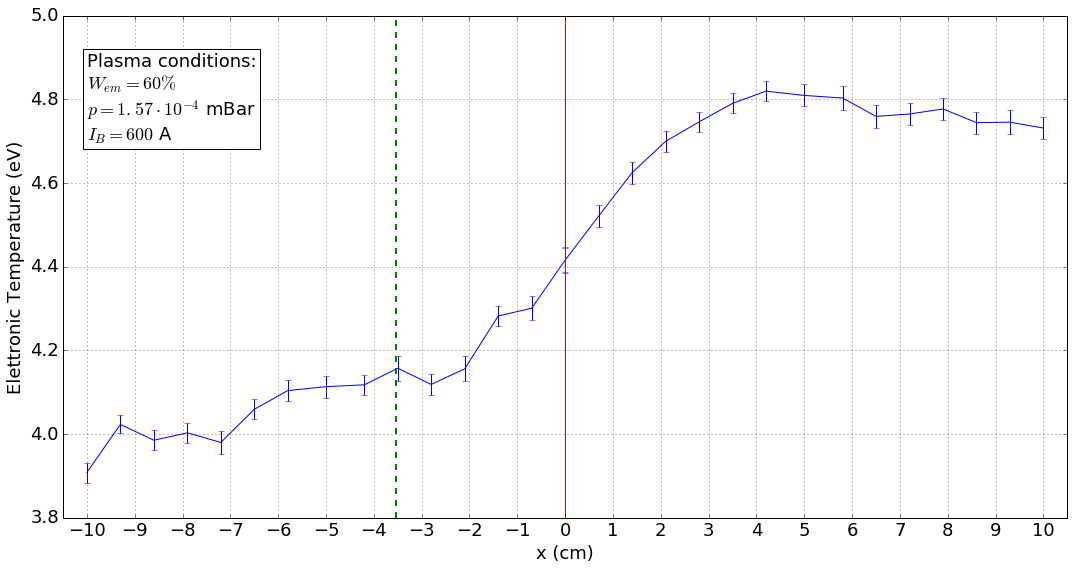

In [9]:
fig1, ax1 = plt.subplots(1,1)
fig1.set_size_inches(15,7)
ax1.grid(True)
ax1.errorbar(x=df.x, y=df.T_e, yerr=df.err_T_e)
ax1.set_xlabel('x (cm)')
ax1.set_ylabel('Elettronic Temperature (eV)')
ax1.set_xbound(-10.5,10.5)
ax1.axvline(x=0, color='r')
ax1.text(-10,4.7, plot_text, fontsize=18,
                bbox=dict(facecolor='white', edgecolor='black'))
fix_ax(ax1,fig1)
fig1.savefig("export/scans/Te_3005.png")

fig2, ax2 = plt.subplots(1,1)
fig2.set_size_inches(15,7)
ax2.grid(True)
ax2.errorbar(x=df.x,y=df.n_e,yerr=df.err_n_e)
ax2.set_xlabel('x')
ax2.set_ylabel('Elettronic density ($m^-3$)')
ax2.set_xbound(-10.5,10.5)
ax2.axvline(x=0, color='r')
ax2.text(5,3.27e16, plot_text, fontsize=18,
                bbox=dict(facecolor='white', edgecolor='black'))
fix_ax(ax2, fig2)
fig2.savefig("export/scans/Ne_3005.png")

fig4, ax4 = plt.subplots(1,1)
fig4.set_size_inches(15,7)
ax4.errorbar(x=df.x, y=df.v_plasma *-1, yerr=df.err_v_plasma)
ax4.grid(True)
ax4.xaxis.set_ticks(np.arange(-10,11,1))
ax4.set_xlabel('x (cm)')
ax4.set_ylabel('V plasma (V)')
ax4.set_xbound(-10.5,10.5)
ax4.axvline(x=0, color='r')
ax4.axvline(x=-3.538,linestyle="dashed", color="g", linewidth=2)
ax4.text(4,-11.8, plot_text, fontsize=18,
               bbox=dict(facecolor='white', edgecolor='black', ))
fig4.set_size_inches(18,9)
fig4.savefig("export/scans/Vplasma_3005.png")

fig5, ax5 = plt.subplots(1,1)
fig5.set_size_inches(15,7)
ax5.errorbar(x=df.x, y=df.i_ionic_sat*(-1), yerr=df.err_i_ionic_sat)
ax5.grid(True)
ax5.set_xlabel('x (cm)')
ax5.set_ylabel('Ionic saturation current (A)')
ax5.set_xbound(-10.5,10.5)
ax5.axvline(x=0, color='r')
ax5.text(5,4.4e-4, plot_text, fontsize=18,
                bbox=dict(facecolor='white', edgecolor='black'))
fix_ax(ax5, fig5)
fig5.savefig("export/scans/Isat_3005.png")

fig6, ax6 = plt.subplots(1,1)
fig6.set_size_inches(15,7)
agg.get_fuh(df, [600]*len(df.x))
agg.get_fuh(df2, [600]*len(df2.x) )
ax6.errorbar(x=df.x, y=df.f_uh*1e-9, yerr = df.err_f_uh *1e-9, color="b")
ax7 = ax6.twinx()
ax7.tick_params(axis='y', colors='green')
ax6.tick_params(axis='y', colors='blue')
ax7.errorbar(x=df2.x, y=df2.f_uh*1e-9, yerr = df2.err_f_uh *1e-9, color="g")
ax6.grid(True)
ax6.xaxis.set_ticks(np.arange(-10,11,1))
ax6.set_xlabel('x (cm)')
ax6.set_ylabel('F upper hybrid (GHZ)')
ax6.set_xbound(-10.5,10.5)
ax6.axvline(x=0, color='r')
ax7.axhline(y=2.45,linestyle="dashed", color="g", linewidth=2)
ax7.set_ybound(1.9, 2.55)
ax6.text(5,2.315, plot_text, fontsize=18,
                bbox=dict(facecolor='white', edgecolor='black'))
fig6.set_size_inches(18,9)
fig6.savefig("export/scans/Fuh_3005.png")

In [17]:
df = agg.aggregate_data('data/data-2005' )
df.sort_values(['x','probe'],inplace=True)
#agg.remove_bias(df,['T_e','n_e','i_ionic_sat','v_floating', 'v_plasma'])
df.head()


Reading dataset:['160520026', '160520031', '160520018', '160520024', '160520029', '160520028', '160520025', '160520023', '160520030', '160520021', '160520016', '160520019', '160520032', '160520027', '160520017', '160520022', '160520033', '160520020']


id  probe    x  I_B         P  W_em       T_e   err_T_e  \
10  160520016      1 -5.1  600  0.000156    60  4.635488  0.026909   
14  160520017      1 -4.8  600  0.000156    60  4.430999  0.026102   
2   160520018      1 -4.5  600  0.000156    60  4.439984  0.028185   
11  160520019      1 -4.2  600  0.000156    60  4.323559  0.031479   
17  160520020      1 -3.9  600  0.000156    60  4.362355  0.027391   

             n_e       err_n_e    ...          err_f_ep  v_plasma  \
10  1.363584e+16  1.005221e+14    ...      2.834555e-10  8.847107   
14  1.339947e+16  1.002910e+14    ...      2.903201e-10  8.640823   
2   1.325104e+16  1.005978e+14    ...      2.961148e-10  8.549767   
11  1.330141e+16  1.144615e+14    ...      3.350109e-10  8.535950   
17  1.370925e+16  1.086302e+14    ...      3.038619e-10  8.654057   

    err_v_plasma     alpha  err_alpha  v_floating  err_v_floating  \
10      0.115580  0.031420   0.000872   -5.059355        0.034855   
14      0.113673  0.033062   0.000911   -4.652173        0.035366   
2       0.119964  0.034639   0.000926   -4.770184        0.035410   
11      0.134066  0.034341   0.001041   -4.434726        0.039628   
17      0.119293  0.031839   0.000945   -4.433008        0.037120   

    i_ionic_sat  err_i_ionic_sat      j_sat  
10    -0.000195         0.000003 -16.285426  
14    -0.000188         0.000003 -15.646163  
2     -0.000186         0.000003 -15.488526  
11    -0.000184         0.000003 -15.342213  
17    -0.000191         0.000003 -15.883410  

[5 rows x 21 columns]

In [18]:
fig1, ax1 = plt.subplots(1,1)
fig1.set_size_inches(15,7)
ax1.grid(True)
ax1.errorbar(x=df.x, y=df.T_e, yerr=df.err_T_e)
ax1.set_xlabel('x')
ax1.set_ylabel('Elettronic Temperature (eV)')
ax1.set_xbound(-10.5,10.5)
ax1.axvline(x=0, color='r')

fig2, ax2 = plt.subplots(1,1)
fig2.set_size_inches(15,7)
ax2.grid(True)
ax2.errorbar(x=df.x,y=df.n_e,yerr=df.err_n_e)
ax2.set_xlabel('x')
ax2.set_ylabel('Elettronic density')
ax2.set_xbound(-10.5,10.5)
ax2.axvline(x=0, color='r')
ax2.axvline(x=-3.538,linestyle="dashed", color="g", linewidth=2)

fig5, ax5 = plt.subplots(1,1)
fig5.set_size_inches(15,7)
ax5.errorbar(x=df.x, y=df.i_ionic_sat, yerr=df.err_i_ionic_sat)
ax5.grid(True)
ax5.set_xlabel('x')
ax5.set_ylabel('Ionic saturation current (A)')
ax5.set_xbound(-10.5,10.5)
ax5.axvline(x=0, color='r')

#fig.savefig('data/data-0605/plot.png')